# Buoyancy Flux Function

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [42]:
params = {
    'flux_depth': -8e-8,  # Example value
    'B0': -4.24e-8           # Example value
}

In [43]:
# Define the piecewise_flux function in Python
def piecewise_flux(t, p):
    time_minutes_mod = (t / (60 * 60)) % 24
    if time_minutes_mod <= 6:
        value = p['flux_depth']
    elif 6 < time_minutes_mod < 18:
        value = math.pi * (p['B0'] - p['flux_depth']) * math.sin((math.pi / 12) * (time_minutes_mod - 6)) + p['flux_depth']
    elif time_minutes_mod >= 18:
        value = p['flux_depth']
    else:
        value = 0
    return value

Max flux value 3.81232996898689e-08


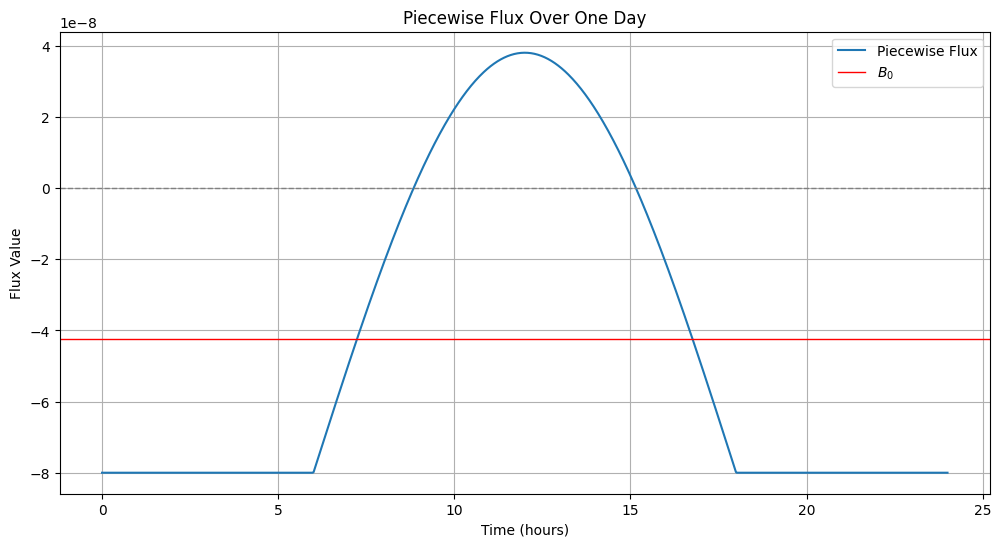

In [44]:
time_array = np.linspace(0, 24 * 60 * 60, 1000)  

flux_values = [piecewise_flux(t, params) for t in time_array]
print(f"Max flux value {max(flux_values)}")
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_array / (60 * 60), flux_values, label='Piecewise Flux')  
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  
plt.axhline(params['B0'], color='red', linestyle='-', linewidth=1,label=f"$B_0$")  # Add this line to plot y=0
plt.xlabel('Time (hours)')
plt.ylabel('Flux Value')
plt.title('Piecewise Flux Over One Day')
plt.legend()
plt.grid(True)
plt.show()